In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from skimage import io, morphology, img_as_bool, segmentation
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_fill_holes

%matplotlib inline

In [5]:
img_shape = (64,64)

In [6]:
def pad_resize(img):
    top = int((224 - img.shape[0])/2)
    left = int((224 - img.shape[1])/2)
    bottom = 224 - img.shape[0] - top
    right = 224 - img.shape[1] - left
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
    img = img/255.
    img = cv2.resize(img, img_shape) #KADD
    return img

def skeletonize(img):
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    img = cv2.bitwise_not(img)
#     element = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
#     done = 0
#     while( done < 1 ):
#         eroded = cv2.erode(img,element)
#         temp = cv2.dilate(eroded,element)
#         temp = cv2.subtract(img,temp)
#         skel = cv2.bitwise_or(skel,temp)
#         img = eroded.copy()

#         zeros = size - cv2.countNonZero(img)
#         if zeros==size:#cv2.countNonZero(img) * 1 >= 0:#
#             done += 1
#     img = skel
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 2)
    img = cv2.bitwise_not(erosion)
    return img

In [23]:
PATH = '../train_images_modified'
images = []
base_class = []
matra_class = []
dot_class = []
total_class = []
for filename in os.listdir(PATH):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(PATH,filename),0)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        a,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
#         kernel = np.ones((5,5),np.uint8)
#         img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#         plt.imshow(img, cmap='gray')
#         plt.show()
#        img = skeletonize(img)
        img = pad_resize(img)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        char_arr = filename[:-4].split('_')[3:]
        if(len(char_arr)>0):
            images.append(img)
            char_arr = [int(i) for i in char_arr]
            total_class.append(char_arr)
            base = [i for i in char_arr if (i>=2308 and i<=2361) or (i==2384) or (i>=2392 and i<=2401) or (i>=2404 and i!=2416 and i!=2417)] 
            assert len(base) != 0, 'too many base classes in the same image (base - {}) (filename - {})'.format(base, filename)
            base_class.append(base[0])
            matra = [i for i in char_arr if i>=2362 and i<=2391]
            dot = [i for i in char_arr if i==2306 or i==2416]
            if(len(matra)>1):
                print(filename)
            elif(len(matra)>0):
                matra_class.append(matra[0])
            else:
                matra_class.append(0)
            if len(dot)>0:
                dot_class.append(1)
            else:
                dot_class.append(0)
            if(len(matra)==0 and len(dot)==0 and len(char_arr)==2):
                print("ohno "+filename)
#             if(len(char_arr)>1):          
#                 matra_class.append(char_arr[1:])
            if len(images)%100==0:
                print("{} Done".format(len(images)))
            

ohno page7_16_10_2350_2417.png
page1_9_15_2351_2364_2366.png
100 Done
ohno page3_6_0_2327_2417.png
page5_3_15_2351_2364_2366.png
page6_1_1_2340_2375_2379.png
200 Done
page7_3_0_2319_2366_2367.png
page1_16_13_2346_2362_2369.png
page6_6_9_2352_2362_2363.png
page4_15_2_2357_2364_2376.png
page0_15_8_2350_2362_2380.png
300 Done
page0_8_8_2330_2375_2379.png
400 Done
page6_10_6_2325_2366_2380.png
page7_15_14_2349_2362_2366.png
page0_9_15_2332_2375_2379.png
500 Done
600 Done
page1_16_0_2325_2362_2380.png
700 Done
page1_8_0_2357_2364_2366.png
page3_18_4_2332_2366_2379.png
800 Done
900 Done
page7_3_13_2319_2366_2367.png
page6_17_13_2351_2364_2366.png
1000 Done
1100 Done
page5_17_5_2325_2362_2376.png
1200 Done
1300 Done
page2_4_1_2357_2364_2366.png
1400 Done
page5_7_8_2325_2367_2388.png
1500 Done
page2_4_20_2346_2366_2390.png
1600 Done
1700 Done
1800 Done


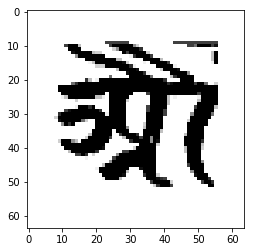

1895


In [8]:
plt.imshow(images[10],"gray")
plt.show()
print(len(images))

In [9]:
len(set(base_class))
freq = {i:base_class.count(i) for i in base_class}
[i for i in freq.keys() if freq[i]==1]

[2392, 2353, 2384, 2415, 2310, 2414]

In [10]:
images = np.array(images)
flat = img_shape[0]*img_shape[1]
x_data = np.reshape(np.array(images), (-1, flat))
y_data = np.array(base_class)

df = pd.DataFrame(x_data, y_data)
df['LABEL'] = df.index

df_no_label = df.drop(columns='LABEL')

TypeError: drop() got an unexpected keyword argument 'columns'

In [11]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import f1_score
# from sklearn.cross_validation import train_test_split

# #print(df.head())
# #print(df_no_label)
# #print(df['LABEL'])

# X_train,X_val,y_train,y_val = train_test_split(df_no_label, df['LABEL'])

# print(X_train.shape)
# print(X_val.shape)

# clf = RandomForestClassifier(max_features='auto', n_estimators=10, max_depth=20)
# clf.fit(X_train, y_train)

# scores = cross_val_score(clf, df_no_label, df['LABEL'], cv=3)
# print(scores)
# scores_f1 = f1_score(clf.predict(X_train),y_train,average='weighted')
# print(scores_f1)
# scores_f1 = f1_score(clf.predict(X_val),y_val,average='weighted')
# print(scores_f1)

In [12]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
le.fit(base_class)
y_labeled = le.transform(base_class)
y_train = np_utils.to_categorical(y_labeled)

Using TensorFlow backend.


In [13]:
# model = Sequential()

# model.add(Dense(256,input_shape=(224*224,),activation = 'sigmoid'))
# model.add(Dense(128,activation = 'sigmoid'))
# model.add(Dense(128,activation = 'sigmoid'))
# model.add(Dense(len(total_char_set),activation = 'sigmoid'))

# print(model.summary())
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=[f1_score(theta=0.5),'accuracy'])
# X_train = X_train.reshape((-1,224*224))
# model.fit(X_train,y_train2,epochs=10,batch_size=32,validation_split=0.3)

In [14]:
print(y_train.shape)
x_train = np.reshape(images,(-1,img_shape[0],img_shape[1],1))
print(x_train.shape)

(1895, 53)
(1895, 64, 64, 1)


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_shape[0],img_shape[1],1),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(base_class)),activation = 'softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
__________

In [17]:
import keras.backend as K

def f1_score(theta):
    def score(y_true, y_pred):

        y_thresh = K.cast(K.greater(y_pred,theta),K.floatx())

        true_pos =  K.sum(y_true * y_thresh)
        false_pos = K.sum(y_true * (1. - y_thresh))
        false_neg = K.sum((1. - y_true) * y_thresh)

        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        
        f1_score_val = 2 * (precision * recall) / (precision + recall)
        return f1_score_val
    return score

def custom_metric(y_true, y_pred):
    return K.cast(K.equal(y_true,
                          K.round(y_pred)),
                  K.floatx())


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 13s 10ms/step - loss: 3.5899 - score: nan - categorical_accuracy: 0.0792 - val_loss: 3.3522 - val_score: nan - val_categorical_accuracy: 0.0598
Epoch 2/30
1326/1326 [==============================] - 13s 10ms/step - loss: 3.4525 - score: nan - categorical_accuracy: 0.0754 - val_loss: 3.3754 - val_score: nan - val_categorical_accuracy: 0.1160
Epoch 3/30
1326/1326 [==============================] - 13s 10ms/step - loss: 3.4107 - score: nan - categorical_accuracy: 0.0671 - val_loss: 3.3530 - val_score: nan - val_categorical_accuracy: 0.1195
Epoch 4/30
1326/1326 [==============================] - 13s 10ms/step - loss: 3.3114 - score: nan - categorical_accuracy: 0.1094 - val_loss: 3.2145 - val_score: nan - val_categorical_accuracy: 0.1072
Epoch 5/30
1326/1326 [==============================] - 13s 10ms/step - loss: 2.8439 - score: nan - categorical_accuracy: 0.2760 - val_loss: 2.3376 - val

# DOT CLASS

In [24]:
y_train = np_utils.to_categorical(dot_class)

In [25]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_shape[0],img_shape[1],1),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(dot_class)),activation = 'softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 14s 11ms/step - loss: 0.3037 - score: 0.9186 - categorical_accuracy: 0.9186 - val_loss: 0.2015 - val_score: 0.9490 - val_categorical_accuracy: 0.9490
Epoch 2/30
1326/1326 [==============================] - 15s 11ms/step - loss: 0.2689 - score: 0.9367 - categorical_accuracy: 0.9367 - val_loss: 0.2016 - val_score: 0.9490 - val_categorical_accuracy: 0.9490
Epoch 3/30
1326/1326 [==============================] - 14s 10ms/step - loss: 0.2674 - score: 0.9374 - categorical_accuracy: 0.9374 - val_loss: 0.2106 - val_score: 0.9490 - val_categorical_accuracy: 0.9490
Epoch 4/30
1326/1326 [==============================] - 13s 10ms/step - loss: 0.2637 - score: 0.9374 - categorical_accuracy: 0.9374 - val_loss: 0.2024 - val_score: 0.9490 - val_categorical_accuracy: 0.9490
Epoch 5/30
1326/1326 [==============================] - 13s 10ms/step - loss: 0.2424 - score: 0.9367 - categorical_accuracy: 0.93

# MATRA CLASS

In [28]:
PATH = '../train_images_modified'
images = []
matra_class = []
for filename in os.listdir(PATH):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(PATH,filename),0)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        a,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
#         kernel = np.ones((5,5),np.uint8)
#         img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#         plt.imshow(img, cmap='gray')
#         plt.show()
#        img = skeletonize(img)
        img = pad_resize(img)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        char_arr = filename[:-4].split('_')[3:]
        if(len(char_arr)>0):
            char_arr = [int(i) for i in char_arr]
            matra = [i for i in char_arr if i>=2362 and i<=2391]
            if(len(matra)>1):
                print(filename)
            elif(len(matra)>0):
                images.append(img)
                matra_class.append(matra[0])
            else:
                images.append(img)
                matra_class.append('0')
            if len(images)%100==0:
                print("{} Done".format(len(images)))
            

page1_9_15_2351_2364_2366.png
100 Done
page5_3_15_2351_2364_2366.png
page6_1_1_2340_2375_2379.png
200 Done
page7_3_0_2319_2366_2367.png
page1_16_13_2346_2362_2369.png
page6_6_9_2352_2362_2363.png
page4_15_2_2357_2364_2376.png
page0_15_8_2350_2362_2380.png
300 Done
page0_8_8_2330_2375_2379.png
400 Done
page6_10_6_2325_2366_2380.png
page7_15_14_2349_2362_2366.png
page0_9_15_2332_2375_2379.png
500 Done
600 Done
page1_16_0_2325_2362_2380.png
700 Done
page1_8_0_2357_2364_2366.png
page3_18_4_2332_2366_2379.png
800 Done
900 Done
page7_3_13_2319_2366_2367.png
page6_17_13_2351_2364_2366.png
1000 Done
1100 Done
page5_17_5_2325_2362_2376.png
1200 Done
1300 Done
page2_4_1_2357_2364_2366.png
1400 Done
page5_7_8_2325_2367_2388.png
1500 Done
page2_4_20_2346_2366_2390.png
1600 Done
1700 Done
1800 Done


In [29]:
le = LabelEncoder()
le.fit(matra_class)
y_labeled = le.transform(matra_class)
y_train = np_utils.to_categorical(y_labeled)

y_train = np_utils.to_categorical(y_labeled)
images = np.array(images)
x_train = np.reshape(images,(-1,img_shape[0],img_shape[1],1))
print(y_train.shape)

(1874, 17)


In [30]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_shape[0],img_shape[1],1),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(matra_class)),activation = 'softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1311 samples, validate on 563 samples
Epoch 1/30
1311/1311 [==============================] - 12s 9ms/step - loss: 0.1711 - score: nan - categorical_accuracy: 0.4249 - val_loss: 0.1559 - val_score: 0.4654 - val_categorical_accuracy: 0.4654
Epoch 2/30
1311/1311 [==============================] - 15s 11ms/step - loss: 0.1375 - score: 0.4606 - categorical_accuracy: 0.5500 - val_loss: 0.1032 - val_score: 0.6587 - val_categorical_accuracy: 0.6661
Epoch 3/30
1311/1311 [==============================] - 13s 10ms/step - loss: 0.0919 - score: 0.6984 - categorical_accuracy: 0.7109 - val_loss: 0.0843 - val_score: 0.7326 - val_categorical_accuracy: 0.7247
Epoch 4/30
1311/1311 [==============================] - 14s 11ms/step - loss: 0.0760 - score: 0.7458 - categorical_accuracy: 0.7567 - val_loss: 0.0723 - val_score: 0.7500 - val_categorical_accuracy: 0.7531
Epoch 5/30
1311/1311 [==============================] - 14s 11ms/step - loss: 0.0670 - score: 0.7779 - categorical_accuracy: 0.7818 -